In [18]:
! pip install langchain langchain-community langchain-openai openai langgraph

In [19]:
from IPython.display import display, Image
from langgraph.graph import START, StateGraph
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode, tools_condition
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

In [20]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

Installing tool package

In [21]:
!pip install -U duckduckgo-search




In [22]:
from langchain_community.tools import DuckDuckGoSearchRun



1st tool

In [23]:
def search_duckduckgo(query:str):
  """
  searching tool
  """
  search = DuckDuckGoSearchRun()
  return search.invoke(query)

In [24]:
result = search_duckduckgo("what are ai agents in english")
print(result)

1 day ago · An AI pipeline developed by CSAIL researchers enables unique hydrodynamic designs for bodyboard-sized vehicles that glide underwater and could help scientists … Nov 22, 2024 · MIT researchers developed an efficient approach for training more reliable reinforcement learning models, focusing on complex tasks that involve variability. This … Jan 17, 2025 · MIT News explores the environmental and sustainability implications of generative AI technologies and … Jan 16, 2025 · MIT Assistant Professor Manish Raghavan uses computational techniques to push toward better solutions to long … Jun 10, 2025 · A new study finds people are more likely to approve of the use of AI in situations where its abilities are perceived as superior to humans’ and where …


/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


2nd tool

In [25]:
def add(a: int, b: int) -> int:
  """
  Adds a and b
  """
  return a+b

3rd tool

In [26]:
def multiply(a: int, b: int) -> int:
  """
  multiply a and b
  """
  return a*b

initializing llm

In [28]:
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, api_key = api_key)

In [29]:
llm.invoke("what are ai agents").content

'AI agents are systems or programs that use artificial intelligence techniques to perform tasks autonomously or semi-autonomously. They can perceive their environment, make decisions, and take actions based on their programming and learned experiences. AI agents can be categorized in various ways, including:\n\n1. **Reactive Agents**: These agents respond to specific stimuli in their environment without maintaining an internal state. They operate based on predefined rules or simple algorithms.\n\n2. **Deliberative Agents**: These agents maintain an internal model of the world and can plan and reason about their actions. They often use techniques like search algorithms and decision-making processes.\n\n3. **Learning Agents**: These agents can improve their performance over time by learning from their experiences. They often use machine learning techniques to adapt to new situations.\n\n4. **Autonomous Agents**: These agents can operate independently without human intervention. They can 

In [30]:
tools = [search_duckduckgo, add, multiply]
llm_with_tools = llm.bind_tools(tools)

In [31]:
def chatbot(state: State):
  return {"messages": llm_with_tools.invoke(state["messages"])}

Making graph

In [32]:
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_node("tools", ToolNode(tools))
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)
graph_builder.add_edge("tools", "chatbot")
react_graph = graph_builder.compile()



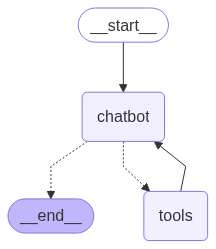

In [33]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [34]:
response = react_graph.invoke({"messages":{"role": "user", "content":"what is the weather temperature in chandigarh. Multiply it by 2 and add 5."}})
print(response)

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x782d52d53bd0>
/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x782d52d53b60>
/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x782d52d539a0>
/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/

{'messages': [HumanMessage(content='what is the weather temperature in chandigarh. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='e85bf226-2cbb-4526-8d99-589334380c22'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lyjbXQMO06oEgVNhBEMyqazA', 'function': {'arguments': '{"query":"current weather temperature in Chandigarh"}', 'name': 'search_duckduckgo'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 106, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'id': 'chatcmpl-BwDVnljZiYavpe27U6JMoq2feojtP', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--57426785-4f09-4965-b752-924549c0e3cf-0'

In [35]:
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is the weather temperature in chandigarh. Multiply it by 2 and add 5.
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (call_lyjbXQMO06oEgVNhBEMyqazA)
 Call ID: call_lyjbXQMO06oEgVNhBEMyqazA
  Args:
    query: current weather temperature in Chandigarh
================================= Tool Message =================================
Name: search_duckduckgo

Jul 11, 2022 · To start, I am an unemployed, disabled veteran. I am returning to school to try and work towards a job that I am capable of. currently I am in need of an iPhone for school … May 22, 2018 · Just move the SIM card from your current phone to the new phone. If the new phone takes a different size, go to an ATT store for a replacement, they will activate it with your … Aug 7, 2018 · You mention over due bills. If your missing credits follow late payments, that’s your answer. P